1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков



In [8]:
# импортируем нужные библиотеки
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Открываем файл
water = pd.read_csv('water.csv')
water.head()


,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


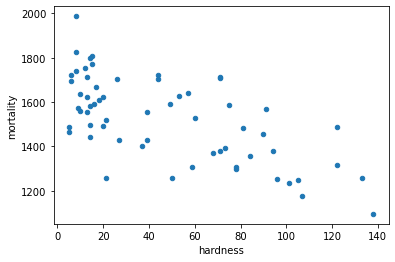

In [5]:
#Строим точечный график
water.plot(kind='scatter', y='mortality', x='hardness')

Из графика видно, что чем ниже жестковть воды тем выше смертность, что может быть следствием возникновения сердечно-сосудистых заболеваний при использовании воды с низкой жесткостью

In [6]:
# Расчитаем коэффициенты корреляции Пирсона
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


Отрицательный коэффициент говорит об обратной связи между данными показателями

In [7]:
# Расчитаем коэффициенты корреляции Спирмена
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [10]:
#Построить модель линейной регрессии
X = water[['hardness']]
y = water['mortality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
X_train.shape

(42, 1)

In [13]:
y_train.shape

(42,)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([-3.13167087])

In [16]:
model.intercept_

1668.9722977277095

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [18]:
#коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

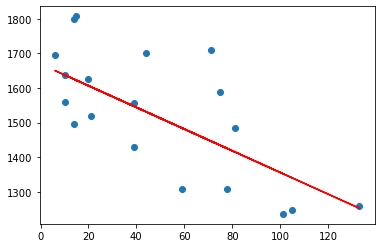

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [25]:
# посмотрим на остатки
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


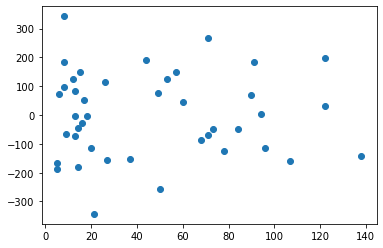

In [26]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

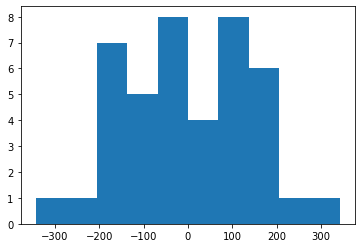

In [27]:
plt.hist(results.resid)

Проведенный анализ показал обратную корреляцию. Чем выше жесткость воды, тем ниже смертность, и чем ниже жесткость, тем выше смертность. Построенная модель не идеальна, присутсвует большое количество остатков. Отсюда можно сказать, что полностью прямой зависимости между данными параметрами нет, есть и другие факторы, влияющие на уровень смертности



2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [30]:
#Разделим датафрейм на южные города
south = water['location'] == 'South'
south = water.loc[south].reset_index()
south.head()

,index,Unnamed: 0,location,town,mortality,hardness
0,0,1,South,Bath,1247,105
1,2,3,South,Birmingham,1466,5
2,7,8,South,Bournemouth,1299,78
3,9,10,South,Brighton,1359,84
4,10,11,South,Bristol,1392,73


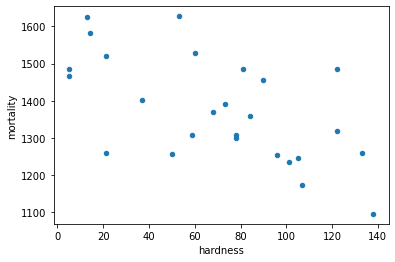

In [31]:
#Строим точечный график
south.plot(kind='scatter', x='hardness', y='mortality')

In [32]:
#Здесь опираясь на график нельзя определить  точную зависимость между факторами

In [33]:
# Коэффициент корреляции Пирсона 
# он уменьшился на 0,03
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [34]:
# Коэффициент корреляции Спирмена 
# также наблюдается снижение коэф. корреляции
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [37]:
#Построим модель линейной регрессии
xs = south[['hardness']]
ys = south['mortality']

xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.30, random_state=50)

model_s = LinearRegression()
model_s.fit(xs_train, ys_train)
model_s.coef_
model_s.intercept_

ys_pred = model_s.predict(xs_test)
#коэффициент детерминации - стал значительно меньше, ближе к нулю, что говорит о низкой зависимости
model_s.score(xs_test, ys_test)

0.045758667765418704

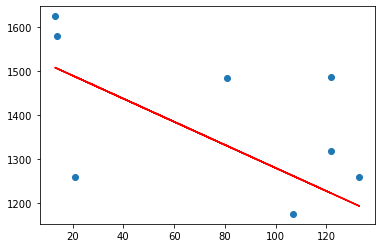

In [38]:
plt.scatter(xs_test, ys_test)
plt.plot(xs_test, ys_pred, c='r')

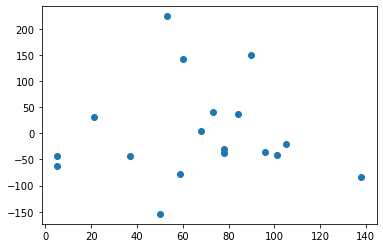

In [39]:
xs_const = sm.add_constant(xs_train)
model_s = sm.OLS(ys_train, xs_const)
results_s = model_s.fit()

plt.scatter(xs_const.iloc[:, 1], results_s.resid)

(array([1., 1., 5., 4., 2., 2., 0., 1., 1., 1.]),
 array([-154.04816235, -116.25992289,  -78.47168343,  -40.68344398,
          -2.89520452,   34.89303494,   72.6812744 ,  110.46951385,
         148.25775331,  186.04599277,  223.83423223]),
 <a list of 10 Patch objects>)

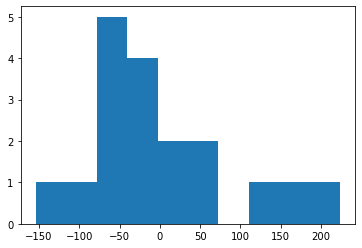

In [40]:
plt.hist(results_s.resid)

In [41]:
#График линейной регрессии и остатков также показывают низкую взаимосвязь данных факторов

In [42]:
#Разделим датафрейм на северные города
north = water['location'] == 'North'
north = water.loc[north].reset_index()
north.head()

,index,Unnamed: 0,location,town,mortality,hardness
0,1,2,North,Birkenhead,1668,17
1,3,4,North,Blackburn,1800,14
2,4,5,North,Blackpool,1609,18
3,5,6,North,Bolton,1558,10
4,6,7,North,Bootle,1807,15


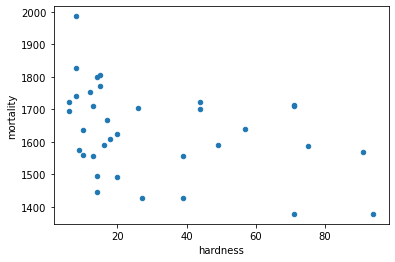

In [45]:
#Строим точечный график - здесь наблюдается большая  взаимосвязь чем в южных городах
north.plot(kind='scatter', x='hardness', y='mortality')

In [46]:
# Коэффициент корреляции Пирсона 
# он уменьшился на 0,3, что говорит о снижении взаимосвязи по сравнению с этим коэффициентом по всему датафрейму
#и по северным городам
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [47]:
# Коэффициент корреляции Спирмена 
# также наблюдается снижение коэф. корреляции по сравнению со всем регионом и северу
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [48]:
#Построим модель линейной регрессии
xn = south[['hardness']]
yn = south['mortality']

xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size=0.30, random_state=50)

model_n = LinearRegression()
model_n.fit(xn_train, yn_train)
model_n.coef_
model_n.intercept_

yn_pred = model_n.predict(xn_test)
#коэффициент детерминации - такой же как и для юга
model_n.score(xn_test, yn_test)

0.045758667765418704

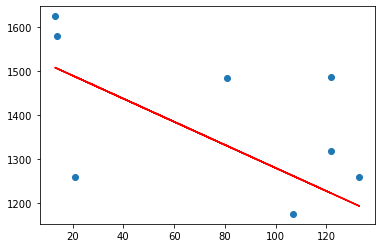

In [49]:
plt.scatter(xn_test, yn_test)
plt.plot(xn_test, yn_pred, c='r')

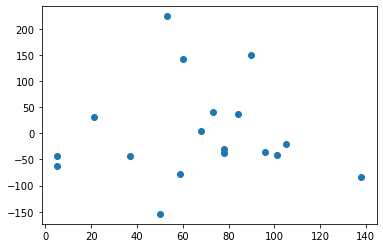

In [50]:
xn_const = sm.add_constant(xn_train)
model_n = sm.OLS(yn_train, xn_const)
results_n = model_n.fit()

plt.scatter(xn_const.iloc[:, 1], results_n.resid)

(array([1., 1., 5., 4., 2., 2., 0., 1., 1., 1.]),
 array([-154.04816235, -116.25992289,  -78.47168343,  -40.68344398,
          -2.89520452,   34.89303494,   72.6812744 ,  110.46951385,
         148.25775331,  186.04599277,  223.83423223]),
 <a list of 10 Patch objects>)

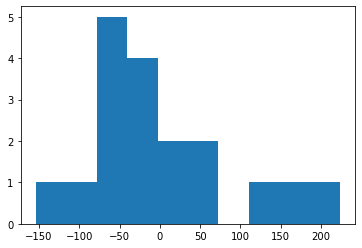

In [51]:
plt.hist(results_n.resid)

In [52]:
#График линейной регрессии и остатков идентичен югу

Из всего можно сделать вывод, что после разделения данных на две группы по регионам взаимосвязь между данными начала падать. Зависимость между смертностью и жесткостью воды есть, но слишком низкая, чтобы говорить о первопричине смертности, здесь имеют место другие факторы, скорее всего нужно проводить многофакторный анализ и строить многофакторную модель зависимости.
